<a href="https://colab.research.google.com/github/MohamedShoaib3/Algorithms_python/blob/main/Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩺 Breast Cancer Classification Project

## 1. Dataset Description
We will be working with the **Breast Cancer Wisconsin Diagnostic Dataset**.  
- The dataset contains **569 records** of patients.  
- Each record has **30 numerical features** (e.g., radius, texture, perimeter, smoothness, etc.) that describe characteristics of cell nuclei present in breast cancer tissue.  
- The **target variable** is `Diagnosis`, which has two classes:
  - **M (Malignant)**
  - **B (Benign)**  

This is a **binary classification problem**, and we will use **Logistic Regression** to build our model.



In [2]:
import pandas as pd

# The data is in a .data file and separated by commas.
# The first few lines are metadata and should be skipped.

features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)



## 2. Project Tasks

### 🔍 Step 1: Data Investigation
- Load the dataset and display its first few rows.
- Check for **null values** and **duplicate entries**.
- Explore the dataset summary (shape, data types, statistics).

### 📊 Step 2: Data Visualization
- Visualize distributions of features.
- Use histograms, boxplots, or pairplots to understand data spread.
- Check relationships between features and the target variable (`Diagnosis`).
- Check count of categorical features and whether classes are balanced or not

### ⚙️ Step 3: Data Preprocessing
- **Encoding:** Convert the categorical column `Diagnosis` into numeric values (e.g., Malignant = 1, Benign = 0).
- **Scaling:** Apply appropriate scaling (e.g., StandardScaler) to numeric features.
- **Drop irrelevant columns** like `ID number`.

### ✂️ Step 4: Train-Test Split
- Split the dataset into **train** and **test** sets.  
- Use the parameter `stratify=y` to ensure class distribution remains the same in both sets.  
- Check if the classes are **balanced**:
  - If imbalanced, either:
    - Handle using techniques like oversampling/undersampling, SMOTE OR  
    - Use the `class_weight="balanced"` parameter in Logistic Regression.

### 🤖 Step 5: Model Training
- Train a **Logistic Regression** model on the training data.

### 📈 Step 6: Model Evaluation
Evaluate the model using:
1. **Confusion Matrix**  
   - Display the confusion matrix.  
   - Visualize it using a heatmap.  
2. **ROC Curve and AUC**  
   - Plot the ROC curve.  
   - Calculate the Area Under the Curve (AUC).  
3. **Classification Report**  
   - Report Precision, Recall, F1-score, and Accuracy.

### 📝 Step 7: Model Interpretation
- Compare **training vs testing performance**.  
- Write down your observations:  
  - Is the model performing well on both sets?  
  - Are there signs of **overfitting** or **underfitting**?  
  - What kind of errors is the model making (false positives vs false negatives)?  
  - What would be the medical consequences of these errors?
  - What is the error of our focus at this problem?


# 📝 1: Import Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)

# 🔍 Step 2: Data Investigation

## 🔍 Step 2.1: First Look at the Dataset
Display the first few rows to understand the structure.

In [4]:
df.head()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 🔍 Step 2.2: Dataset Shape
Check the number of rows and columns.

In [5]:
df.shape

(569, 32)

## 🔍 Step 2.3: Dataset Info
Check column names, data types, and non-null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 🔍 Step 2.4: Summary Statistics
Get descriptive statistics for numerical features.

In [7]:
df.describe()

,ID number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 🔍 Step 2.5: Missing Values
Check if there are any missing values.

In [8]:
df.isnull().sum()

,0
ID number,0
Diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


## 🔍 Step 2.6: Duplicate Rows
Check if the dataset contains duplicate records.

In [9]:
df.duplicated().sum()

np.int64(0)

# 📊 Step 3: Data Visualization
In this step, we explore the dataset visually to better understand the distribution of features and the relationship with the target variable (Diagnosis).
We will check:
1. Distribution of the target variable (class balance)
2. Histograms of numerical features
3. Boxplots to detect outliers
4. Correlation heatmap


## 📊 Step 3.1: Class Distribution
Check if classes are balanced (Malignant vs Benign).


/tmp/ipython-input-307174288.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Diagnosis", data=df, palette="Set2")


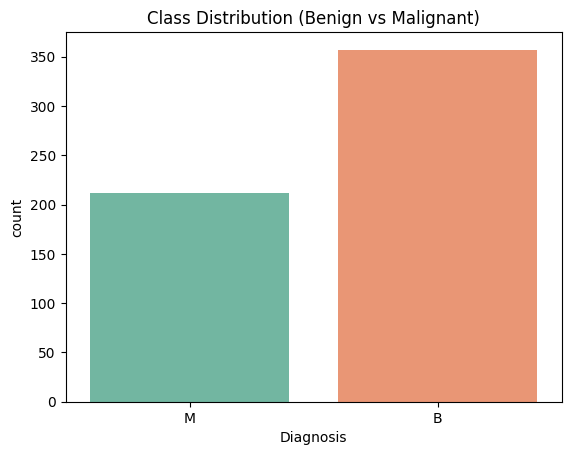

Diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
sns.countplot(x="Diagnosis", data=df, palette="Set2")
plt.title("Class Distribution (Benign vs Malignant)")
plt.show()
print(df["Diagnosis"].value_counts())

## 📊 Step 3.2: Histograms of Features
Visualize distributions of the numerical features.

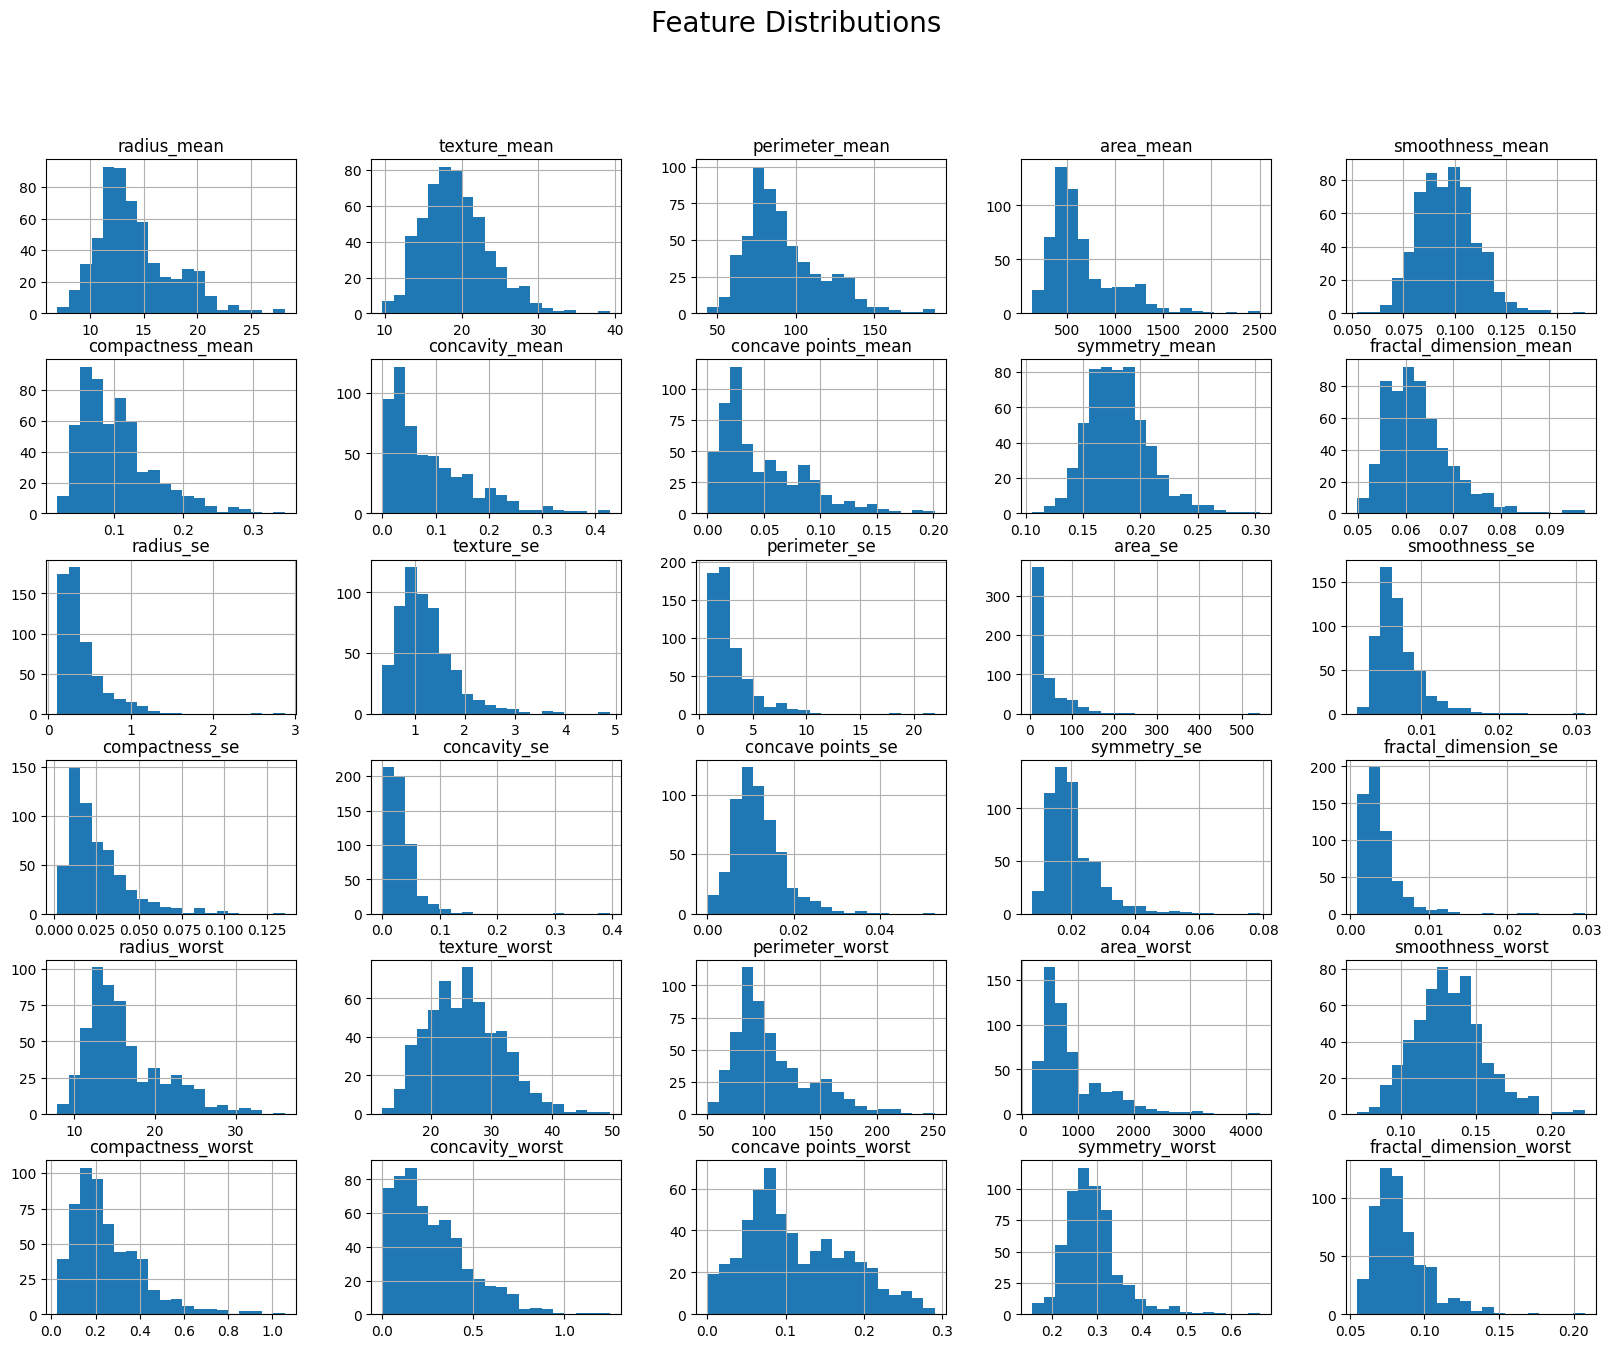

In [11]:
df.drop(["ID number", "Diagnosis"], axis=1).hist(bins=20, figsize=(20,15))
plt.suptitle("Feature Distributions", size=20)
plt.show()

## 📊 Step 3.3: Boxplots
Check feature distributions by diagnosis to see differences between Benign and Malignant tumors.

/tmp/ipython-input-1466902151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y="radius_mean", data=df, palette="Set2")


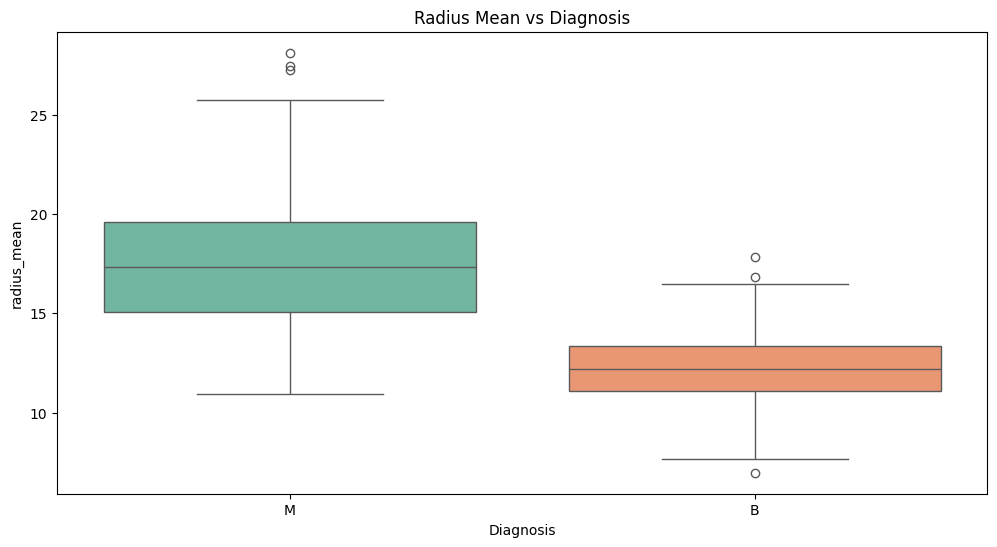

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Diagnosis", y="radius_mean", data=df, palette="Set2")
plt.title("Radius Mean vs Diagnosis")
plt.show()

## 📊 Step 3.4: Correlation Heatmap
Check correlation between numerical features to see multicollinearity.

/tmp/ipython-input-898667401.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Diagnosis":{"M":1,"B":0}})


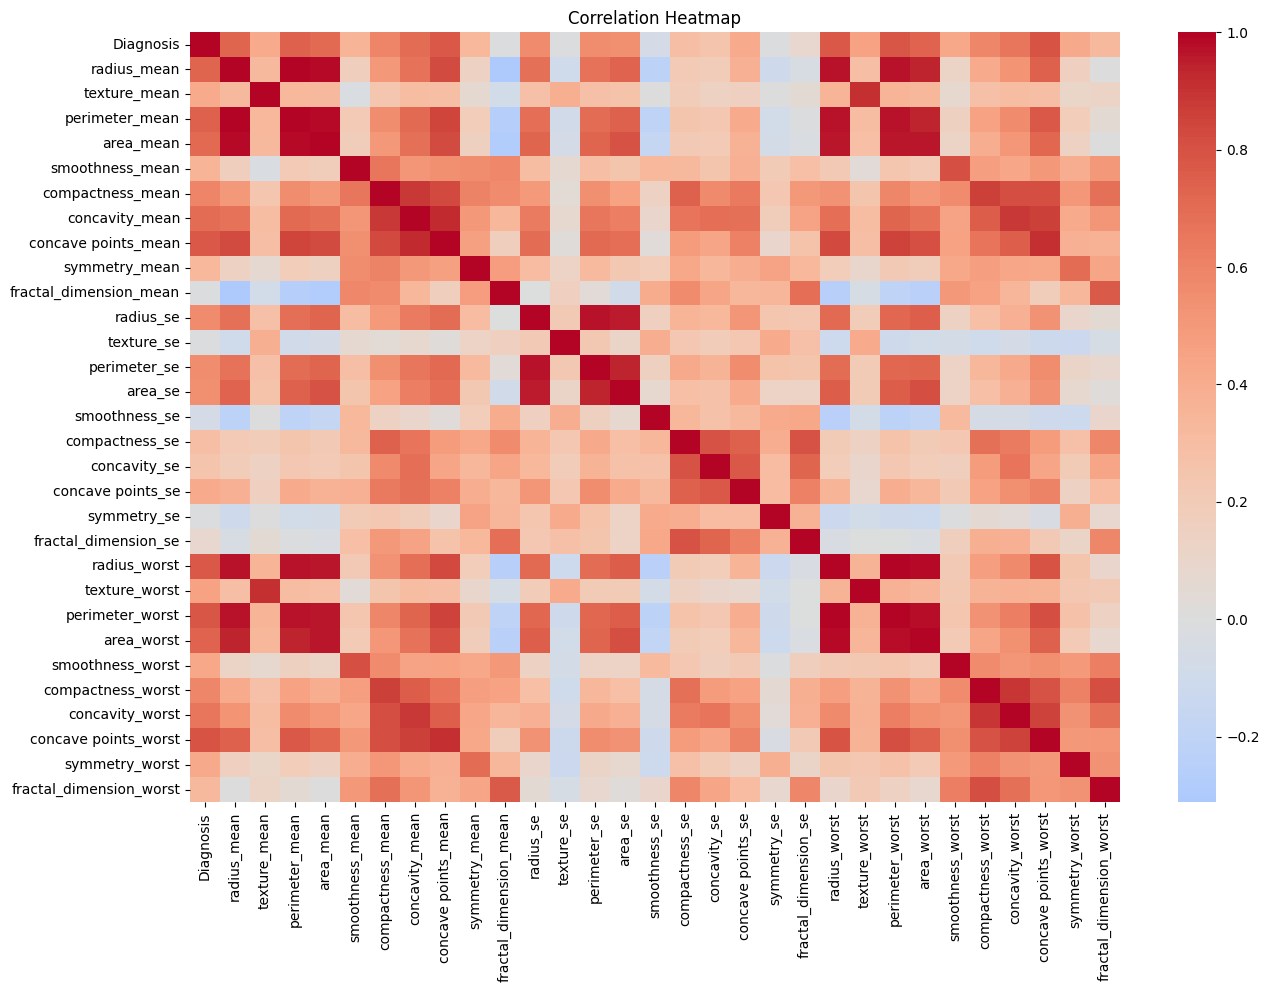

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(["ID number"], axis=1)
              .replace({"Diagnosis":{"M":1,"B":0}})
              .corr(),
            cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# ⚙️ Step 4: Data Preprocessing

##⚙️ 4.1: Drop ID column


In [14]:
df_clean = df.drop("ID number", axis=1)

##⚙️ 4.2: Encode Diagnosis (M=1, B=0)

In [15]:
df_clean["Diagnosis"] = df_clean["Diagnosis"].map({"M":1, "B":0})

df_clean.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## ⚙️ Step 4.3: Train-Test Split
Split the data into training and test sets.
We will use stratify=y to maintain class balance.

In [16]:
X = df_clean.drop("Diagnosis", axis=1)
y = df_clean["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Class distribution in train:", y_train.value_counts(normalize=True))
print("Class distribution in test:", y_test.value_counts(normalize=True))

Train shape: (455, 30)
Test shape: (114, 30)
Class distribution in train: Diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
Class distribution in test: Diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


## ⚙️ Step 4.4: Feature Scaling
Apply StandardScaler to normalize features for Logistic Regression.

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling done!


# 🤖 Step 5: Model Training
We will train a **Logistic Regression** model on the scaled training data.
- Logistic Regression is suitable for binary classification problems.
- We will use `class_weight="balanced"` to handle any class imbalance.

In [18]:
log_reg = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# 📈 Step 6: Model Evaluation
We will evaluate the trained Logistic Regression model using:
1. Confusion Matrix
2. ROC Curve and AUC
3. Classification Report

## 🔹 Step 6.1: Confusion Matrix
The confusion matrix shows how many samples are correctly/incorrectly classified.

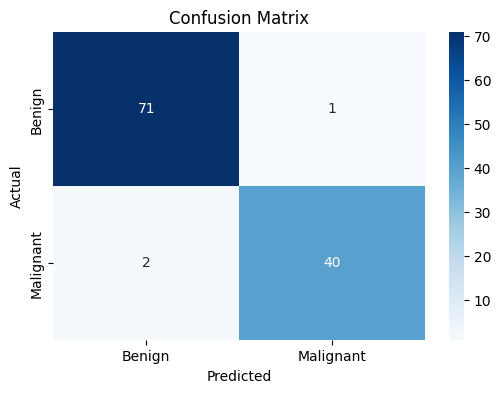

In [19]:
y_pred = log_reg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Malignant"], yticklabels=["Benign","Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 🔹 Step 6.2: ROC Curve & AUC
The ROC Curve shows the trade-off between sensitivity and specificity.
The Area Under the Curve (AUC) indicates how well the model separates classes.

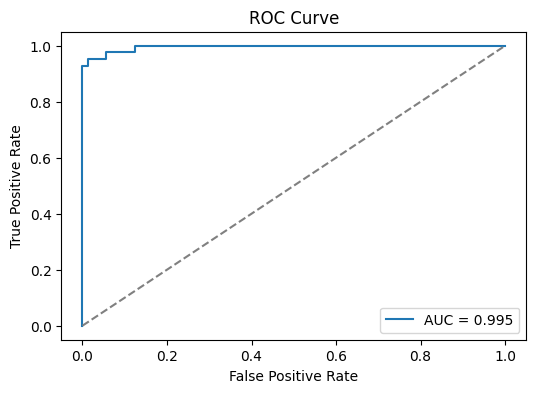

In [20]:
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 🔹 Step 6.3: Classification Report
We will check Precision, Recall, F1-score, and Accuracy for both classes.

In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 📝 Step 7: Save & Load Model
We will save the trained Logistic Regression model using `joblib`.

In [23]:
import joblib

joblib.dump(log_reg, "logistic_model.pkl")
print("Model saved as logistic_model.pkl")

Model saved as logistic_model.pkl
